Name: Haris Zahid

Student Number: 500845895

# **Dataset 1**

K-Means Implementation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

New clusters: [2. 0. 1. 2. 1. 1. 0. 2.]
New centers: [[1.5        3.5       ]
 [7.         4.33333333]
 [3.66666667 9.        ]]


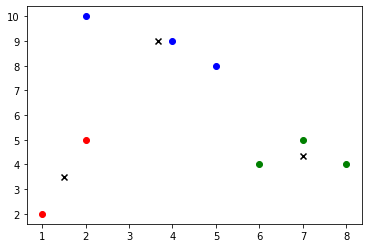

It takes 1 iteration and 1 epoch for the seeds to converage.


In [ ]:
# Define the dataset
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Define the initial seeds
centers = np.array([[2, 5], [8, 4], [4, 9]])

# Define the number of clusters
k = len(centers)

# Define the number of examples
n = X.shape[0]

# Define the maximum number of epochs
max_epochs = 1

# Define the arrays to store the clusters and the centers
clusters = np.zeros(n)
new_centers = np.zeros((k, 2))

# Run the K-means algorithm for one epoch
for epoch in range(max_epochs):
    # Assign each example to the nearest center
    for i in range(n):
        distances = np.linalg.norm(X[i] - centers, axis=1)
        cluster = np.argmin(distances)
        clusters[i] = cluster

    # Compute the new centers
    for j in range(k):
        new_centers[j] = np.mean(X[clusters == j], axis=0)

    # Update the centers
    centers = new_centers.copy()

# Print the new clusters and the centers
print("New clusters:", clusters)
print("New centers:", centers)

# Plot the clusters and the centers
colors = ['r', 'g', 'b']
for i in range(n):
    plt.scatter(X[i, 0], X[i, 1], c=colors[int(clusters[i])])
for j in range(k):
    plt.scatter(centers[j, 0], centers[j, 1], c='k', marker='x')
plt.show()

print("It takes 1 iteration and 1 epoch for the seeds to converage.")

Nearest Neighbour Implemenation:


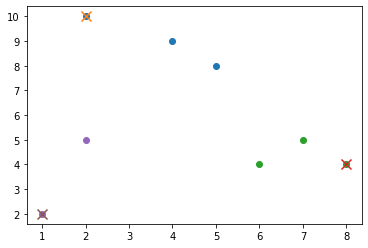

In [ ]:
# Define the dataset
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Define the threshold value
threshold = 4

# Define a function to calculate the Euclidean distance between two points
def euclidean_distance(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

# Initialize the list of cluster centers
centers = []

# Choose an arbitrary point as the first cluster center
centers.append(X[0])

# Iterate until all points have been assigned to a cluster or become cluster centers themselves
while True:
    # Calculate the distance between each point and each cluster center
    distances = np.zeros((X.shape[0], len(centers)))
    for i, center in enumerate(centers):
        for j, point in enumerate(X):
            distances[j, i] = euclidean_distance(center, point)

    # Find the minimum distance to each cluster center for each point
    min_distances = np.min(distances, axis=1)

    # Find the index of the closest cluster center for each point
    closest_centers = np.argmin(distances, axis=1)

    # Check if any points are closer to a cluster center than the threshold value
    if np.max(min_distances) > threshold:
        # Find the point with the maximum minimum distance to a cluster center
        new_center = X[np.argmax(min_distances)]
        centers.append(new_center)
    else:
        break

# Plot the clusters
for i, center in enumerate(centers):
    cluster_points = X[closest_centers == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1])
    plt.scatter(center[0], center[1], s=100, marker='x')

plt.show()

DBScan Implementation

Clusters: [[(8, 4), (8, 4), (7, 5), (6, 4), (8, 4), (7, 5), (6, 4), (8, 4), (7, 5), (6, 4)], [(5, 8), (5, 8), (4, 9), (5, 8), (4, 9)]]
Noise: {(1, 2), (2, 10), (2, 5)}


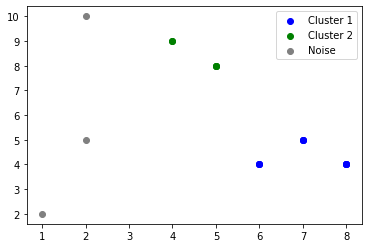

In [ ]:
import math

def distance(p1, p2):
    return math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

def get_neighbors(data, point, eps):
    neighbors = []
    for p in data:
        if distance(point, p) <= eps:
            neighbors.append(p)
    return neighbors

def dbscan(data, eps, min_pts):
    clusters = []
    visited = set()
    noise = set()
    for point in data:
        if point in visited:
            continue
        visited.add(point)
        neighbors = get_neighbors(data, point, eps)
        if len(neighbors) < min_pts:
            noise.add(point)
        else:
            cluster = [point]
            clusters.append(cluster)
            expand_cluster(data, point, neighbors, cluster, visited, eps, min_pts)
    return clusters, noise

def expand_cluster(data, point, neighbors, cluster, visited, eps, min_pts):
    for p in neighbors:
        if p not in visited:
            visited.add(p)
            p_neighbors = get_neighbors(data, p, eps)
            if len(p_neighbors) >= min_pts:
                neighbors.extend(p_neighbors)
        if not any([p in c for c in cluster]):
            cluster.append(p)

X = [(2,10), (2,5), (8,4), (5,8), (7,5), (6,4), (1,2), (4,9)]
clusters, noise = dbscan(X, eps=2, min_pts=2)
print("Clusters:", clusters)
print("Noise:", noise)

# Plot the clusters and noise
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, cluster in enumerate(clusters):
    x = [p[0] for p in cluster]
    y = [p[1] for p in cluster]
    plt.scatter(x, y, c=colors[i%len(colors)], label=f'Cluster {i+1}')
x = [p[0] for p in noise]
y = [p[1] for p in noise]
plt.scatter(x, y, c='grey', label='Noise')
plt.legend()
plt.show()

Clusters: [[(2, 10), (2, 10), (4, 9), (2, 10), (5, 8), (4, 9), (5, 8), (4, 9)], [(2, 5), (2, 5), (1, 2), (2, 5), (1, 2)], [(8, 4), (8, 4), (7, 5), (6, 4), (8, 4), (7, 5), (6, 4), (8, 4), (7, 5), (6, 4)]]
Noise: set()


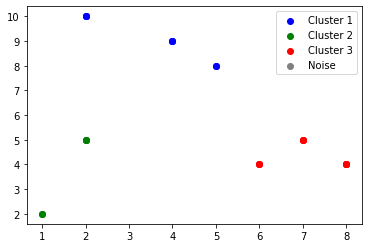

In [ ]:
data = [(2,10), (2,5), (8,4), (5,8), (7,5), (6,4), (1,2), (4,9)]
clusters, noise = dbscan(data, eps=(np.sqrt(10)), min_pts=2)
print("Clusters:", clusters)
print("Noise:", noise)

# Plot the clusters and noise
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, cluster in enumerate(clusters):
    x = [p[0] for p in cluster]
    y = [p[1] for p in cluster]
    plt.scatter(x, y, c=colors[i%len(colors)], label=f'Cluster {i+1}')
x = [p[0] for p in noise]
y = [p[1] for p in noise]
plt.scatter(x, y, c='grey', label='Noise')
plt.legend()
plt.show()

Questions:

Q9: My results are similar to k-means but my centroids are different because of the way the algorithims are implemented, however, my clusters remain the same.

Q11: Nearest neighbour is more efficient when it comes to larger datasets because it is adding onto the cluster of its nearest neightbour where as k-means must spend the time to calculate the distance from each centroid and place itself within one. K-means seems to be more efficient for the smaller dataset in our case but not so for the larger ones.


# **Dataset 2**

K-means Implementation

Assuming random value of iterations for converagence

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, n_clusters=2, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = X[np.random.choice(X.shape[0], self.n_clusters), :]
        for i in range(self.max_iter):
          # Compute the distance to each centroid
            distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array([X[self.labels == k, :].mean(axis=0) for k in range(self.n_clusters)])
            if np.allclose(new_centroids, self.centroids):
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis, :] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

67.90123456790124


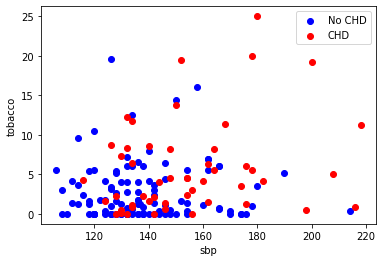

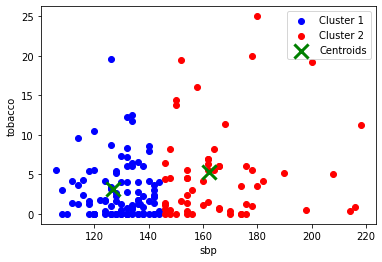

In [ ]:
# Load data
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

# Select sbp and tobacco features
X = df[['sbp', 'tobacco']].values

# Split data into training and testing sets
X_train = X[:300, :]
X_test = X[300:, :]

# Fit K-means model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)

# Predict labels for testing set
y_pred = kmeans.predict(X_test)

# # Calculate accuracy
y_true = df['chd'][300:].values
# accuracy = np.mean(y_pred == y_true)
# print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate TP, TN, FP, FN
TP = sum((y_true == 1) & (y_pred == 1))
TN = sum((y_true == 0) & (y_pred == 0))
FP = sum((y_true == 0) & (y_pred == 1))
FN = sum((y_true == 1) & (y_pred == 0))

# Calculate accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)
print(accuracy*100)


# Plot actual data points
plt.scatter(X_test[y_true == 0, 0], X_test[y_true == 0, 1], c='b', label='No CHD')
plt.scatter(X_test[y_true == 1, 0], X_test[y_true == 1, 1], c='r', label='CHD')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.show()

# Plot predicted data points
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], c='b', label='Cluster 1')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], c='r', label='Cluster 2')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], marker='x', s=200, linewidths=3, color='Green', zorder=10, label='Centroids')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.legend()
plt.show()


Nearest Neighbor Implementation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the heart disease dataset
url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
data = pd.read_csv(url)

# Split the dataset into training and testing data
X_train = data.iloc[:300, :]
X_test = data.iloc[300:, :]

# Select the "sbp" and "tobacco" features for clustering
features = ["sbp", "tobacco"]

# Define a function to compute the Euclidean distance between two data points
def euclidean_distance(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

# Define a function to find the nearest neighbor of a given test data point in the training data
def find_nearest_neighbor(test_point, train_data, features):
    distances = []
    for index, row in train_data.iterrows():
        train_point = np.array(row[features])
        distance = euclidean_distance(test_point, train_point)
        distances.append((index, distance))
    distances.sort(key=lambda x: x[1])
    return distances[0][0]

# Define a function to predict the class of a test data point based on the nearest neighbor in the training data
def predict(test_point, train_data, features):
    nearest_neighbor = find_nearest_neighbor(test_point, train_data, features)
    return train_data.loc[nearest_neighbor, "chd"]

# Predict the classes of the test data points and compute the accuracy
TP = TN = FP = FN = 0
for index, row in X_test.iterrows():
    test_point = np.array(row[features])
    true_label = row["chd"]
    predicted_label = predict(test_point, X_train, features)
    if true_label == 1 and predicted_label == 1:
        TP += 1
    elif true_label == 0 and predicted_label == 0:
        TN += 1
    elif true_label == 0 and predicted_label == 1:
        FP += 1
    elif true_label == 1 and predicted_label == 0:
        FN += 1

accuracy = (TP + TN) / (TP+TN+FN+FP)
print("Accuracy:", accuracy*100)

Accuracy: 56.17283950617284


DBScan Implementation

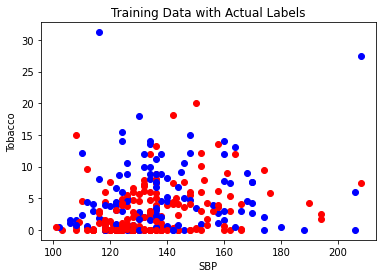

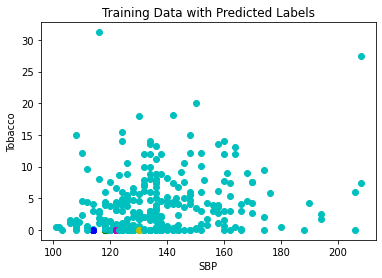

Accuracy: 64.19753086419753


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
url = 'https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv'
data = pd.read_csv(url)

# Separate the training and testing data
train_data = data[:300]
test_data = data[300:]

# Extract the features for clustering
X = train_data[['sbp', 'tobacco']]

# Define the parameters for DBSCAN
epsilon = 0.002
min_samples = 5

# Define the distance function for DBSCAN
def euclidean_distance(x1, x2):
    return np.sqrt((x1[0] - x2[0])**2 + (x1[1] - x2[1])**2)

# Implement DBSCAN from scratch
def DBSCAN(X, epsilon, min_samples):
    labels = [0]*len(X)
    C = 0
    for i in range(len(X)):
        if labels[i] != 0:
            continue
        neighbors = []
        for j in range(len(X)):
            if euclidean_distance(X[i], X[j]) < epsilon:
                neighbors.append(j)
        if len(neighbors) < min_samples:
            labels[i] = -1
        else:
            C += 1
            labels[i] = C
            while len(neighbors) > 0:
                current = neighbors[0]
                if labels[current] == -1:
                    labels[current] = C
                elif labels[current] == 0:
                    labels[current] = C
                    current_neighbors = []
                    for j in range(len(X)):
                        if euclidean_distance(X[current], X[j]) < epsilon:
                            current_neighbors.append(j)
                    if len(current_neighbors) >= min_samples:
                        neighbors += current_neighbors
                neighbors = neighbors[1:]
    return labels

# Cluster the training data using DBSCAN
labels = DBSCAN(X.values, epsilon, min_samples)

# Plot the training data with actual labels
colors = ['r', 'b']
for i in range(len(train_data)):
    plt.scatter(train_data.iloc[i]['sbp'], train_data.iloc[i]['tobacco'], c=colors[train_data.iloc[i]['chd']])
plt.title('Training Data with Actual Labels')
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.show()

# Plot the training data with predicted labels
colors = ['r', 'b', 'g', 'y', 'm', 'c']
for i in range(len(train_data)):
    plt.scatter(train_data.iloc[i]['sbp'], train_data.iloc[i]['tobacco'], c=colors[labels[i]])
plt.title('Training Data with Predicted Labels')
plt.xlabel('SBP')
plt.ylabel('Tobacco')
plt.show()

# Cluster the testing data using DBSCAN
X_test = test_data[['sbp', 'tobacco']]
labels_test = DBSCAN(X_test.values, epsilon, min_samples)

# # Calculate the accuracy
# accuracy = sum(labels_test == test_data['chd']) / len(test_data)
# print('Accuracy:', accuracy)

# Extract actual labels of test data
y_test = test_data['chd'].values

# Initialize TP, TN, FP, and FN to 0
TP = TN = FP = FN = 0

# Loop through each data point in the test data
for i in range(len(y_test)):
    # If actual label is positive and predicted label is positive, increment TP
    if y_test[i] == 1 and labels_test[i] != -1:
        TP += 1
    # If actual label is negative and predicted label is negative, increment TN
    elif y_test[i] == 0 and labels_test[i] == -1:
        TN += 1
    # If actual label is negative and predicted label is positive, increment FP
    elif y_test[i] == 0 and labels_test[i] != -1:
        FP += 1
    # If actual label is positive and predicted label is negative, increment FN
    elif y_test[i] == 1 and labels_test[i] == -1:
        FN += 1

# Calculate accuracy using TP, TN, FP, and FN formula
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Print accuracy to console
print("Accuracy:", accuracy*100)

Questions:

Q15: The accuracy for the 3 algorithms ranges between 55% to 70% with k-means having the highest at 67% accuracy. Althought I am not 100% sure if K-means is supposed to provide the greatest accuracy but my implementation shows this.

# SkLearn Implementation

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
print(f"Dataset 1:\n{kmeans.cluster_centers_}")

url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

X2 = df[['sbp', 'tobacco']].values
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
print(f"Dataset 2:\n{kmeans.cluster_centers_}")

dataset 1:
[[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
dataset 2:
[[5.33333333 6.66666667]
 [1.5        3.5       ]]


In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)

url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

X2 = df[['sbp', 'tobacco']].values
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X2)
distances, indices = nbrs.kneighbors(X2)
print(indices)

[[0 7]
 [1 6]
 [2 4]
 [3 7]
 [4 2]
 [5 4]
 [6 1]
 [7 3]]
[[  0 140]
 [  1 145]
 [  2 265]
 [  3 107]
 [  4  11]
 [  5 371]
 [  6 319]
 [  7 376]
 [ 48   8]
 [213   9]
 [ 10 403]
 [ 11   4]
 [ 56 260]
 [213   9]
 [ 14 311]
 [ 15 104]
 [ 16 420]
 [ 17  27]
 [ 18 105]
 [ 19 149]
 [ 20 280]
 [ 21 307]
 [ 22 292]
 [ 23 343]
 [ 24 284]
 [207  25]
 [ 26 460]
 [ 27  17]
 [ 28 449]
 [388  29]
 [ 30 445]
 [ 31  18]
 [ 32 249]
 [ 33 398]
 [ 34 150]
 [ 35 135]
 [ 36 362]
 [ 37 226]
 [193 447]
 [ 39 231]
 [ 40 265]
 [ 41   1]
 [ 42 138]
 [ 43 141]
 [ 48   8]
 [ 45 373]
 [ 46 396]
 [ 47 405]
 [ 48   8]
 [ 49 368]
 [ 69  50]
 [ 51 202]
 [ 52 359]
 [ 53 128]
 [ 54 364]
 [ 55 452]
 [ 56 260]
 [ 57 236]
 [ 58 192]
 [ 59  89]
 [ 60 190]
 [ 61 343]
 [ 62 129]
 [ 63  77]
 [193 447]
 [ 65 223]
 [ 66 277]
 [ 67 289]
 [ 68  93]
 [ 69  50]
 [ 56 260]
 [ 71 232]
 [ 72 143]
 [ 73 375]
 [ 74 103]
 [ 75  97]
 [ 76 286]
 [ 77  63]
 [ 78 182]
 [ 79 153]
 [ 80 376]
 [ 81 381]
 [ 82 387]
 [ 83 422]
 [303 251]
 [ 85 39

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd
X = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
clusteringW2 = DBSCAN(eps=2, min_samples=2).fit(X)
print(clusteringW2.labels_)
print(clusteringW2)
clusteringW10 = DBSCAN(eps=10**0.5, min_samples=2).fit(X)
print(clusteringW10.labels_)
print(clusteringW10)

url = "https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv"
df = pd.read_csv(url)

X2 = df[['sbp', 'tobacco']].values
clustering = DBSCAN(eps=0.002, min_samples=5).fit(X2)
print(clustering.labels_)
print(clustering)

[-1 -1  0  1  0  0 -1  1]
DBSCAN(eps=2, min_samples=2)
[0 1 2 0 2 2 1 0]
DBSCAN(eps=3.1622776601683795, min_samples=2)
[-1 -1 -1 -1 -1 -1 -1 -1  0  1 -1 -1  2  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1  4 -1  0 -1 -1 -1
  0 -1  5 -1 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  5  2 -1
 -1 -1 -1  6  7 -1 -1 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  6 -1 -1 -1 -1  2 -1 -1 -1 -1 -1 -1  9  0 -1 -1 -1 -1  8 -1 -1 -1  3
 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  4  9 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 -1 -1 -1 10 -1  5 -1 -1 -1
 -1 -1 -1 -1  9 -1  8 -1 -1  4 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  3 -1 10  8 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  7 -1
 -1 -1  0 -1 10 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  5 10 -1 -1 -1  5  9
 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1  8 -1 -1 -1 -1 -1 -1 -1 -1  2 -1 -1 -1
 -1 -1 -1 -1 -1 -1  3 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1  7 -1
 -1 -

Questions:

Q16: My k-means and dbscan algorithms seem to be the same/similar to the sklearn library however i have some doubts that my NN implementation is similar.

# **Lab Questions:**

1. How well a cluster can predict the chd values of the points in the cluster is the metric used to assess a cluster's performance. The metrics used to measure this are true positives, true negatives, false positives, and false negatives. As opposed to false outcomes, which are the cluster's incorrect predictions, true outcomes are those that came true.

2. Using precision and recall is a different way to assess how well the cluster performs. Precision is the proportion of positive predictions that the algorithm can accurately foresee out of all the positive predictions. The percentage of correctly predicted positives from the dataset's actual positive values is referred to as recall.


Cites:
https://www.youtube.com/watch?v=uLs-EYUpGAw&t=233s&ab_channel=EmmaDing

https://scikit-learn.org/stable/modules/neighbors.html

https://becominghuman.ai/dbscan-clustering-algorithm-implementation-from-scratch-python-9950af5eed97

https://towardsdatascience.com/understanding-dbscan-algorithm-and-implementation-from-scratch-c256289479c5